In [1]:
import batoid
from batoid.utils import normalized
import os
import yaml
import numpy as np
from ipywidgets import interact
import ipywidgets as widgets
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [2]:
fiducial_telescope = batoid.Optic.fromYaml("DECam.yaml")

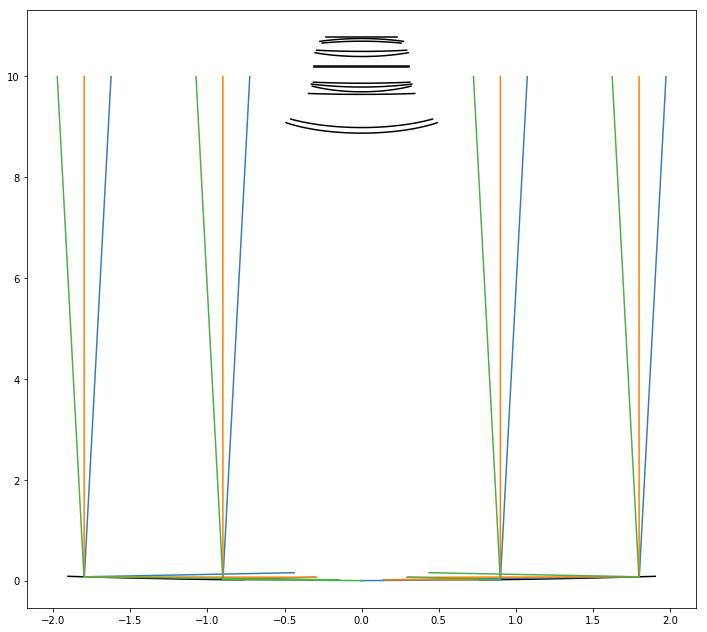

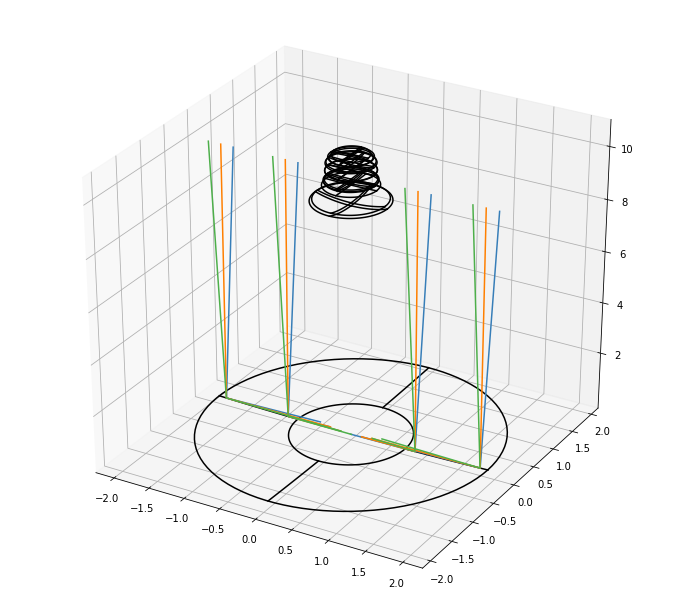

In [3]:
fig1 = plt.figure(figsize=(12, 11))
ax1 = fig1.add_subplot(111)
fiducial_telescope.draw2d(ax1, c='k')

fig2 = plt.figure(figsize=(12, 11))
ax2 = fig2.add_subplot(111, projection='3d')
fiducial_telescope.draw3d(ax2, c='k')

p0_left = np.array([-1.8, 0, 0])
p0_right = np.array([1.8, 0, 0])
p0_lmid = np.array([-0.9, 0, 0])
p0_rmid = np.array([0.9, 0, 0])
v_left = normalized(np.array([-1*np.pi/180, 0, -1]))/1.000277
v_mid = normalized(np.array([0, 0, -1]))/1.000277
v_right = normalized(np.array([1*np.pi/180, 0, -1]))/1.000277

for v, c in zip([v_left, v_mid, v_right], ['#377eb8', '#ff7f00', '#4daf4a']):
    rays = []
    for p0 in [p0_left, p0_lmid, p0_rmid, p0_right]:
        ray = batoid.Ray(p0, v, t=0, wavelength=500e-9)
        p0 = ray.positionAtTime(-10)        
        rays.append(batoid.Ray(p0, v, t=0, wavelength=500e-9))
    traceFull = fiducial_telescope.traceFull(batoid.RayVector(rays))
    batoid.drawTrace2d(ax1, traceFull, c=c)
    batoid.drawTrace3d(ax2, traceFull, c=c)    

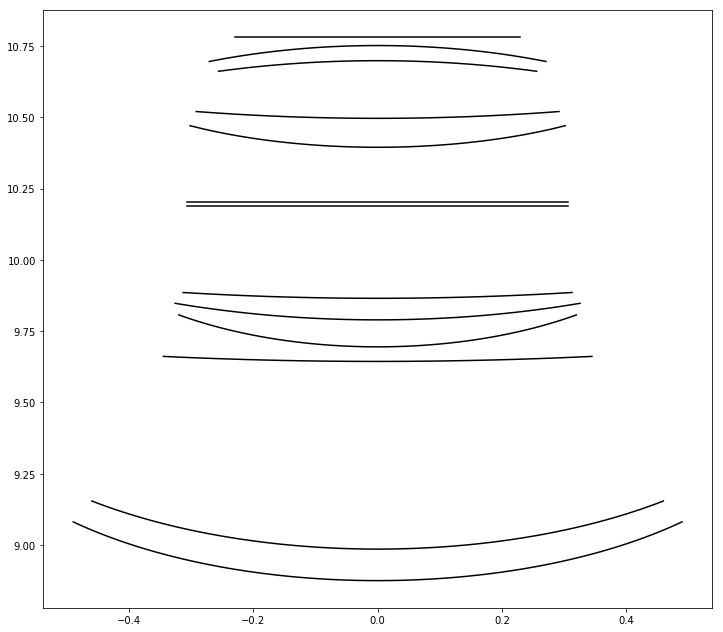

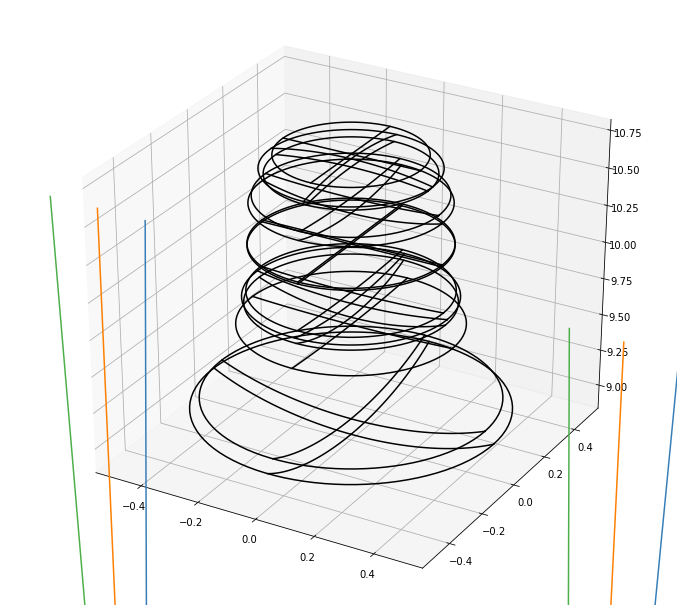

In [4]:
fig1 = plt.figure(figsize=(12, 11))
ax1 = fig1.add_subplot(111)
fiducial_telescope['BlancoDECam.DECam'].draw2d(ax1, c='k')
ax1.set_xlim(ax1.get_xlim())
ax1.set_ylim(ax1.get_ylim())

fig2 = plt.figure(figsize=(12, 11))
ax2 = fig2.add_subplot(111, projection='3d')
fiducial_telescope['BlancoDECam.DECam'].draw3d(ax2, c='k')
ax2.set_xlim(ax2.get_xlim())
ax2.set_ylim(ax2.get_ylim())
ax2.set_zlim(ax2.get_zlim())

p0_left = np.array([-1.8, 0, 0])
p0_right = np.array([1.8, 0, 0])
p0_lmid = np.array([-0.9, 0, 0])
p0_rmid = np.array([0.9, 0, 0])
v_left = normalized(np.array([-1*np.pi/180, 0, -1]))/1.000277
v_mid = normalized(np.array([0, 0, -1]))/1.000277
v_right = normalized(np.array([1*np.pi/180, 0, -1]))/1.000277

for v, c in zip([v_left, v_mid, v_right], ['#377eb8', '#ff7f00', '#4daf4a']):
    rays = []
    for p0 in [p0_left, p0_lmid, p0_rmid, p0_right]:
        ray = batoid.Ray(p0, v, t=0, wavelength=500e-9)
        p0 = ray.positionAtTime(-10)        
        rays.append(batoid.Ray(p0, v, t=0, wavelength=500e-9))
    traceFull = fiducial_telescope.traceFull(batoid.RayVector(rays))
    batoid.drawTrace2d(ax1, traceFull, c=c)
    batoid.drawTrace3d(ax2, traceFull, c=c)    